<a href="https://colab.research.google.com/github/TMKarunarathne/FYP/blob/main/Copy_of_SARMA_rolling_forcasting_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.arima_model import ARMA,ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
from time import time
from sklearn.metrics import mean_squared_error,mean_absolute_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive
Mounted at /content/gdrive


In [ ]:
Cell_num=4613
csv_file = '/content/gdrive/MyDrive/Data_Set/Cell_'+str(Cell_num)+'_new_0002.csv'
df = pd.read_csv(csv_file,index_col='datetime',parse_dates=True)

In [ ]:
# Cell_num=5045
# csv_file = '../Cell_'+str(Cell_num)+'_new_0002.csv'
# df = pd.read_csv(csv_file,index_col='datetime',parse_dates=True)
# df.index.freq = '10min'
# df

In [ ]:
# The feature we observed
FEA='Internet'
df1 = df[FEA]
#df1

In [ ]:
# plt.figure(figsize=(10,5))
# plt.plot(df1)
# plt.title(FEA, fontsize=10)
# #for year in range(2011,2021):
# #   plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', linewidth=0.8)

In [ ]:
len(df1.index)

8928

# Hours

In [ ]:
df_new=df[FEA].resample('H').sum()
df_h=pd.DataFrame(df_new)
df_h.index.freq = 'H'
#df_h

# Rolling

In [ ]:
OD =(4,0,1)
SOD=(1,1,1,24)

for i in range(0,12):
        
    train_data = df_h[i*4:24*7+i*4]              # 07days
    test_data = df_h[24*7+i*4:24*7+i*4+4]           # 01 day
    test_data.index.freq='H'
    train_data.index.freq ='H'
    #train_data

    #model = ARIMA(train_data,order=our_mode)
    model = SARIMAX(train_data,order=OD,seasonal_order=SOD)
    results = model.fit()
    #results.summary()

    start=len(train_data)
    end=len(train_data)+len(test_data)-1
    print(i,start,end)
    predict = results.predict(start=start, end=end, dynamic=False).rename('SARIMA Predictions')
    pred1=predict.to_frame()
    
    if i==0:
        predictions=pred1
    else:
        predictions=[predictions , pred1]
        predictions = pd.concat(predictions)
        

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 168 171


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 168 171


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 168 171


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 168 171
4 168 171
5 168 171


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6 168 171
7 168 171
8 168 171


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


9 168 171


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


10 168 171
11 168 171


In [ ]:
#predictions

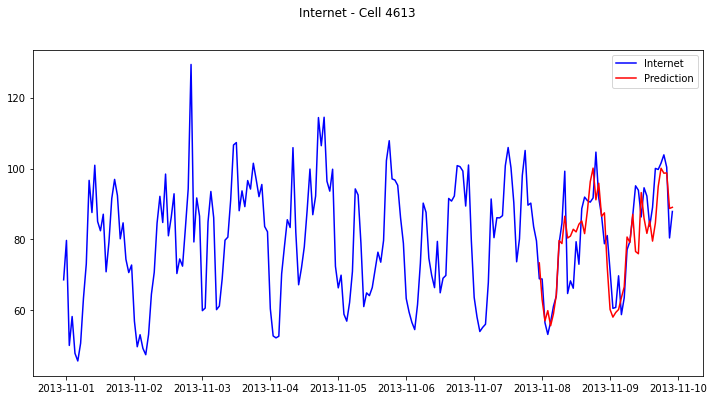

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_h[:24*9] , color='b', label='Internet')
plt.plot(predictions, color='r', label='Prediction')
plt.suptitle(FEA+' - Cell '+str(Cell_num) );
plt.legend()
#plt.tight_layout()

 
figname = str(Cell_num) + '_SARIMA_Rol_4sam_' + FEA
images_dir = '/content/gdrive/My Drive/FYP_saved_plots'
plt.savefig(f"{images_dir}/"+figname+".png")


In [ ]:
test_data = df_h[24*(7):24*9]
mae=mean_absolute_error(test_data,predictions)
mse=mean_squared_error(test_data,predictions)
rmse=np.sqrt(mean_squared_error(test_data,predictions))
print(str(Cell_num)+str(OD)+str(SOD))
print('mae =',mae) #mean absolute error
print('mse =',mse) #mean square error
print('rmse =',rmse)

4613(4, 0, 1)(1, 1, 1, 24)
mae = 6.519758041195519
mse = 68.92997096348556
rmse = 8.302407540194926
